In [1]:
import pandas as pd
import numpy as np
import IPython.display as ipd
from speechbrain.pretrained import EncoderClassifier
import os 
import librosa
import torch
import matplotlib.pyplot as plt


torchvision is not available - cannot save figures


In [148]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech
model_path = "/data3/abraham/tts/AfriSpeech-TTS/src/experiments/afri_tts_speech_t5_denoised/checkpoints/checkpoint-19500"
model_path = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(model_path)
model = SpeechT5ForTextToSpeech.from_pretrained(model_path)
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")


In [149]:
device ="cuda:0"
def get_speaker_model(spk_model_name):

    speaker_model = EncoderClassifier.from_hparams(
        source=spk_model_name,
        run_opts={"device": device},
        savedir=os.path.join("/tmp", spk_model_name)
    )
    return speaker_model

def create_speaker_embedding( speech):
    speaker_model = get_speaker_model("speechbrain/spkrec-xvect-voxceleb")
    
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(speech).to(device))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().to("cpu").numpy()
    return speaker_embeddings

In [157]:
#accent Swati
data = pd.read_csv("/data3/abraham/tts/AfriSpeech-TTS/data/afritts-test-unseen-clean.csv")
sample= data.sample(1)
path = sample['audio_paths'].values[0].replace("/AfriSpeech-TTS-D/", "/data3/data/AfriSpeech-TTS-D/")
print(path)
#path = "/data3/data/AfriSpeech-TTS-D/train/b2e4c7b1-6d02-4404-8fb3-fc89d57b79b7/dcbf6c18e9cc0596c29573455910a8a8_KYjcmMP2.wav"
sample, sr = librosa.load(path, sr=16000)

/data3/data/AfriSpeech-TTS-D/train/1ec28b7c-344e-4a01-bb59-4d7e68aec846/1944963274a976ea3116e83af2687678_4xDLmDFI.wav


In [163]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

144431684

In [158]:
speaker_embeddings= create_speaker_embedding(sample)
speaker_embeddings = torch.tensor(speaker_embeddings).unsqueeze(0)
text = "this is a man that I know. i am happy to meet him. We meet in Abuja yesterday"
inputs = processor(text=text, return_tensors="pt")


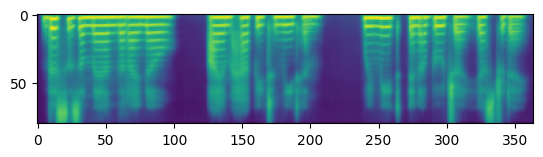

In [159]:
model.eval()
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)
plt.figure()
plt.imshow(spectrogram.T)
plt.show()

In [154]:
from transformers import SpeechT5HifiGan
from IPython.display import Audio
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
with torch.no_grad():
    speech = vocoder(spectrogram)
Audio(speech.numpy(), rate=16000)

In [147]:
from transformers import SpeechT5HifiGan
from IPython.display import Audio
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
with torch.no_grad():
    speech = vocoder(spectrogram)
Audio(speech.numpy(), rate=16000)

In [131]:
from transformers import SpeechT5HifiGan
from IPython.display import Audio
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
with torch.no_grad():
    speech = vocoder(spectrogram)
Audio(speech.numpy(), rate=16000)

In [127]:
#reference audios 
from IPython.display import Audio
Audio(path, rate=16000)

In [99]:
from IPython.display import Audio
Audio("/data3/data/AfriSpeech-TTS-D/predictions/speech_t5_v1.0/316afe7ee80e41038b70131c9f79f7b0_DPGGhO8C.wav", rate=16000)